In [1]:
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
plt.style.use('seaborn-dark')
#import utils

C:\Users\Dell\AppData\Local\Temp\ipykernel_1240\1586419430.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [46]:
def frequency_spectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    k = np.arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range
    
    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]
    return frqarr, abs(x)

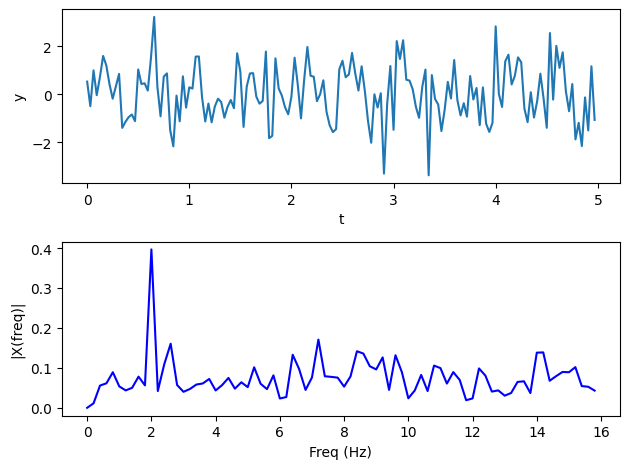

In [48]:
# Sine sample with a frequency of 1hz and add some noise
sr = 32  # sampling rate\
frequency=2
y = np.linspace(0, frequency*2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 1, y.shape)
t = np.arange(len(y)) / float(sr)

plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_spectrum(y, sr)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()

plt.show()

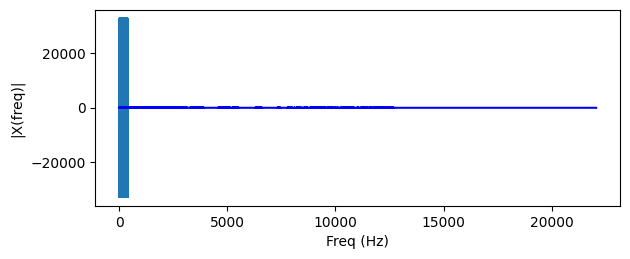

In [62]:
music_file_name = "Veritasium Background Music (Firefly in a Fairytale).wav"
#here_path = os.path.dirname(os.path.realpath("Veritasium Background Music (Firefly in a Fairytale).mp4"))

#wave_file_path = os.path.join(here_path, wav_file_name)
wave_file_path = os.path.realpath(music_file_name)
sr, signal = wavfile.read(wave_file_path)

y = signal[:, 0]  # use the first channel (or take their average, alternatively)
t = np.arange(len(y)) / float(sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_spectrum(y, sr)

plt.subplot(2, 1,1)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()

plt.show()

In [52]:
def get_piano_notes():   
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 440 #Frequency of Note A4
    keys = np.array([x+str(y) for y in range(0,9) for x in octave])
    # Trim to standard 88 keys
    start = np.where(keys == 'A0')[0][0]
    end = np.where(keys == 'C8')[0][0]
    keys = keys[start:end+1]
    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 # stop
    return note_freqs

In [2]:

def get_sine_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    t = np.linspace(0, duration, int(sample_rate*duration)) # Time axis
    wave = amplitude*np.sin(2*np.pi*frequency*t)
    return wave

In [4]:
# Get middle C frequency
#note_freqs = get_piano_notes()
frequency = 5000#note_freqs['C8']

# Pure sine wave
sample_rate=44100
sine_wave = get_sine_wave(frequency, duration=20,sample_rate=sample_rate, amplitude=4096)
wavfile.write('pure_c.wav', rate=sample_rate, data=sine_wave.astype(np.int16))

C:\Users\Dell\AppData\Local\Temp\ipykernel_18144\759948662.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


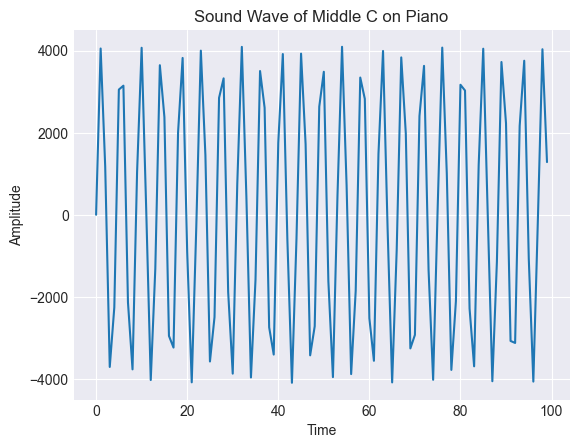

In [89]:
# Load data from wav file
sample_rate, middle_c = wavfile.read('pure_c.wav')

# Plot sound wave
plt.plot(middle_c[:100])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of Middle C on Piano')
plt.grid()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18144\161694094.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


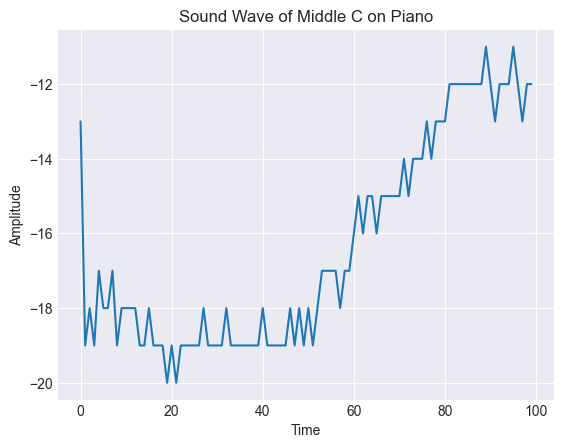

In [94]:


import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

# Load data from wav file
sample_rate, middle_c = wavfile.read('piano-C5.wav')

# Plot sound wave
plt.plot(middle_c[:100])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of Middle C on Piano')
plt.grid()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18144\1237285671.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


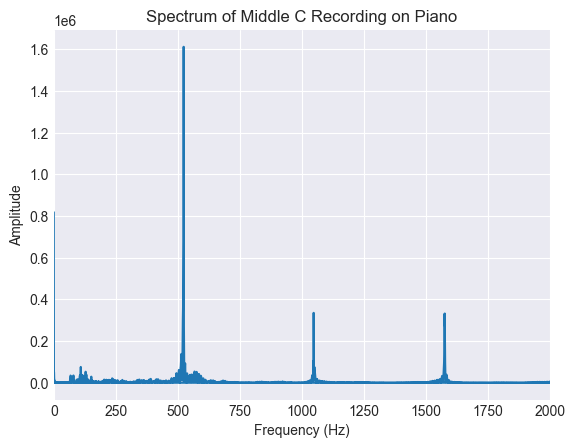

In [96]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

# Load data from wav file
sample_rate, middle_c = wavfile.read('piano-C5.wav')

#FFT
t = np.arange(middle_c.shape[0])
freq = np.fft.fftfreq(t.shape[-1])*sample_rate
sp = np.fft.fft(middle_c) 

# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Middle C Recording on Piano')
plt.xlim((0, 2000))
plt.grid()

In [ ]:
# Get positive frequency
idx = np.where(freq > 0)[0]
freq = freq[idx]
sp = sp[idx]

# Get dominant frequencies
sort = np.argsort(-abs(sp.real))[:100]
dom_freq = freq[sort]

# Round and calculate amplitude ratio
freq_ratio = np.round(dom_freq/frequency)
unique_freq_ratio = np.unique(freq_ratio)
amp_ratio = abs(sp.real[sort]/np.sum(sp.real[sort]))
factor = np.zeros((int(unique_freq_ratio[-1]), ))
for i in range(factor.shape[0]):
    idx = np.where(freq_ratio==i+1)[0]
    factor[i] = np.sum(amp_ratio[idx])
factor = factor/np.sum(factor)

In [ ]:
def apply_overtones(frequency, duration, factor, sample_rate=44100, amplitude=4096):

    assert abs(1-sum(factor)) < 1e-8
    
    frequencies = np.minimum(np.array([frequency*(x+1) for x in range(len(factor))]), sample_rate//2)
    amplitudes = np.array([amplitude*x for x in factor])
    
    fundamental = get_sine_wave(frequencies[0], duration, sample_rate, amplitudes[0])
    for i in range(1, len(factor)):
        overtone = get_sine_wave(frequencies[i], duration, sample_rate, amplitudes[i])
        fundamental += overtone
    return fundamental

# Construct harmonic series
note = apply_overtones(frequency, duration=2.5, factor=factor)

In [ ]:
def get_adsr_weights(frequency, duration, length, decay, sustain_level, sample_rate=44100):

    assert abs(sum(length)-1) < 1e-8
    assert len(length) ==len(decay) == 4
    
    intervals = int(duration*frequency)
    len_A = np.maximum(int(intervals*length[0]),1)
    len_D = np.maximum(int(intervals*length[1]),1)
    len_S = np.maximum(int(intervals*length[2]),1)
    len_R = np.maximum(int(intervals*length[3]),1)
    
    decay_A = decay[0]
    decay_D = decay[1]
    decay_S = decay[2]
    decay_R = decay[3]
    
    A = 1/np.array([(1-decay_A)**n for n in range(len_A)])
    A = A/np.nanmax(A)
    D = np.array([(1-decay_D)**n for n in range(len_D)])
    D = D*(1-sustain_level)+sustain_level
    S = np.array([(1-decay_S)**n for n in range(len_S)])
    S = S*sustain_level
    R = np.array([(1-decay_R)**n for n in range(len_R)])
    R = R*S[-1]
    
    weights = np.concatenate((A,D,S,R))
    smoothing = np.array([0.1*(1-0.1)**n for n in range(5)])
    smoothing = smoothing/np.nansum(smoothing)
    weights = np.convolve(weights, smoothing, mode='same')
    
    weights = np.repeat(weights, int(sample_rate*duration/intervals))
    tail = int(sample_rate*duration-weights.shape[0])
    if tail > 0:
        weights = np.concatenate((weights, weights[-1]-weights[-1]/tail*np.arange(tail)))
    return weights

In [ ]:
# Get sound wave
note = apply_overtones(frequency, duration=2.5, factor=factor)

# Apply smooth ADSR weights
weights = get_adsr_weights(frequency, duration=2.5, length=[0.05, 0.25, 0.55, 0.15],
                           decay=[0.075,0.02,0.005,0.1], sustain_level=0.1)

# Write to file
data = note*weights
data = data*(4096/np.max(data)) # Adjusting the Amplitude 
wavfile.write('synthetic_c.wav', sample_rate, data.astype(np.int16))

In [ ]:
# Get frequency of notes
note_freqs = utils.get_piano_notes()
C4 = utils.get_sine_wave(note_freqs['C4'], 2, amplitude=2048)  # Middle C
C5 = utils.get_sine_wave(note_freqs['C5'], 2, amplitude=2048)  # C one octave above

# Plot
plt.figure(figsize=(12,4))
plt.plot(C4[:2500], label='C4')
plt.plot(C5[:2500], label='C5')
plt.plot((C4+C5)[:2500], label='Octave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Perfect Consonance (Octave)')
plt.grid()
plt.legend()

In [ ]:
def apply_pedal(note_values, bar_value):
    # Check that we have whole number of bars
    assert sum(note_values) % bar_value == 0
    new_values = []
    start = 0
    while True:
        # Count total duration from end of last bar
        cum_value = np.cumsum(np.array(note_values[start:]))
        # Find end of this bar
        end = np.where(cum_value == bar_value)[0][0]
        if end == 0: # If the note takes up the whole bar
            new_values += [note_values[start]]
        else:
            this_bar = np.array(note_values[start:start+end+1])
            # New value of note is the remainder of bar = (total duration of bar) - (cumulative duration thus far)
            new_values += [bar_value-np.sum(this_bar[:i]) for i in range(len(this_bar))]
        start += end+1
        if start == len(note_values):
            break
    return new_values

In [ ]:
def get_song_data(music_notes, note_values, bar_value, factor, length,
                  decay, sustain_level, sample_rate=44100, amplitude=4096):
    # Get note frequencies
    note_freqs = get_piano_notes()
    frequencies = [note_freqs[note] for note in music_notes]
    # Get new note durations with sustain applied
    new_values = apply_pedal(note_values, bar_value)
    # End of each note without sustain
    end_idx = np.cumsum(np.array(note_values)*sample_rate).astype(int)
    # Start of each note
    start_idx = np.concatenate(([0], end_idx[:-1]))
    # End of note with sustain
    end_idx = np.array([start_idx[i]+new_values[i]*sample_rate for i in range(len(new_values))]).astype(int)
    
    # Total duration of the piece
    duration = int(sum(note_values)*sample_rate)    
    song = np.zeros((duration,))
    for i in range(len(music_notes)):
        # Fundamental + overtones
        this_note = apply_overtones(frequencies[i], new_values[i], factor)
        # ADSR model
        weights = get_adsr_weights(frequencies[i], new_values[i], length, 
                                   decay, sustain_level)
        song[start_idx[i]:end_idx[i]] += this_note*weights

    song = song*(amplitude/np.max(song))
    return song